<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2020 / 2021</h2>
    <h2>Übung 4</h2>
    <h3>Allgemeine Informationen:</h3>
    <p>Schreiben Sie Ihre Antwort an die Stelle <i>YOUR ANSWER HERE</i>.</p>
    <p>Wenn Sie eine Zelle bearbeiten, löschen Sie die Zeile <i>raise NotImplementedError()</i>.</p>
    <p>Fügen Sie keine neuen Zellen hinzu oder löschen Zellen.</p>
    <h3>Abgabetermin</h3>
    <p>Die Abgabe der Hausaufgabe ist am 5.01.2021 um <strong>12:00 Uhr mittags</strong>! Vergessen Sie nicht Ihre Übung abzugeben.</p>
    <h2>Viel Erfolg!</h2>   
</div>

<div class="alert alert-block alert-warning">
    <h2>Hinweise zur Bearbeitung der Übung</h2>
    <h3>Angabe von Ergebnissen</h3>
    <ul>
        <li>Sie müssen nicht runden. Wir testen ob Ihr Ergebnis um maximal $5\%$ vom exaktem Wert abweicht. $f_{rel }= \frac{|x_{exakt} - x_{Studi}|}{x_{exakt}} \leq 0.05$</li>
        <li>Prozentzahlen werden immer als Zahl zwischen 0 und 1 angegeben. 30% wird somit als 0.3 angegeben.</li>
        <li>Fließkommazahlen werden mit einem Dezimalpunkt angegeben, nicht mit einem Komma. $\frac{1}{4} \rightarrow 0.25$.</li>
    </ul>
    <h3>Programmcode</h3>
    <ul>
        <li>Benutzen Sie nur die in der nächsten Zelle angegebenen Bibliotheken mit den dort benutzten Namen. Wenn Sie also etwas aus der Bibliothek <i>random</i> nutzen wollen, verwenden Sie den Namen <i>rd</i>.</li>
        <li>Das Ergebnis einer Funktion muss mittels <i>return</i> zurückgegeben werden. Ein <i>print</i> Statement ist keine gültige Rückgabe.</li>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart & Run All. Damit führen Sie das Notebook von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die Zeilen <i>raise NotImplementedError()</i> wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
    </ul>
    <h3>Plots</h3>
    <ul>
        <li>Jeder Plot soll eine Achsenbeschriftung, einen Titel, eine Legende und ein Grid haben.</li>
    </ul>
    
</div>

In [2]:
import math
import collections
import itertools        
import glob
import numpy as np
import random as rd
import pandas as pd        
import matplotlib.pyplot as plt
from scipy import stats

# Pandas

In dieser Übung benutzen wir die Python Bibliothek ```pandas```. Eine kurze Einführung dazu finden Sie hier im Jupyterhub im Ordner ```Materials/01-Pandas/Intro-to-Pandas```. Dieser Ordner befindet sich im Hauptverzeichnis des Jupyterhubs.

# Gewicht / Größe

Zusätzlich zu diesem Notebook wurde Ihnen die Datei ```health.csv``` im Ordner ```data``` zur Verfügung gestellt.

Dieser Datensatz enthält Umfrageergebnisse einer Gesundheitsumfrage unter Jugendlichen und jungen Erwachsenen aus den USA (https://www.icpsr.umich.edu/icpsrweb/DSDR/studies/21600).

Im Rahmen der National Longitudinal Study of Adolescent to Adult Health wurden 20000 Teilnehmer zu verschiedensten Themen rund um die Gesundheit befragt. Der Datensatz ```health.csv``` enthält einen Auszug der Fragen und Antworten von ca. 5000 Teilnehmern.

Der Datensatz enthält folgende Werte:

- AID - Pseudonym für jeden Teilnehmer
- H4WGT - Gewicht der Teilnehmer
- H4HGT - Größe der Teilnehmer
- BIO_SEX4 - Geschlecht der Teilnehmer
- H4OD1Y - Das Geburtsjahr der Teilnehmer

## Gewicht / Größe a) [5 Punkte]

Laden Sie die Daten in einen pandas *DataFrame* und benennen Sie die Spalten wie folgt um:

- H4WGT - Gewicht
- H4HGT - Groesse
- BIO_SEX4 - Geschlecht
- H4OD1Y - Geburtsjahr

Nennen Sie den neuen *DataFrame* ```health```

In [3]:
health = pd.read_csv("data/health.csv",names = ("AID","Gewicht","Groesse","Geschlecht","Geburtsjahr"),header = 0)
health
# YOUR CODE HERE
# raise NotImplementedError()

,AID,Gewicht,Groesse,Geschlecht,Geburtsjahr
0,57101310,113.9,180.0,Female,1976
1,57103869,107.8,202.0,Male,1976
2,57109625,68.0,161.0,Male,1981
3,57111071,89.4,177.0,Male,1981
4,57113943,150.6,185.5,Male,1979
...,...,...,...,...,...
5109,99719930,58.6,167.5,Female,1982
5110,99719939,97.0,174.5,Male,1981
5111,99719970,80.6,178.0,Male,1981
5112,99719976,75.3,165.0,Female,1980


## Gewicht / Größe b) [5 Punkte]

Plotten Sie Gewicht (x-Achse) und Größe (y-Achse) der Teilnehmer in einem Scatterplot. 

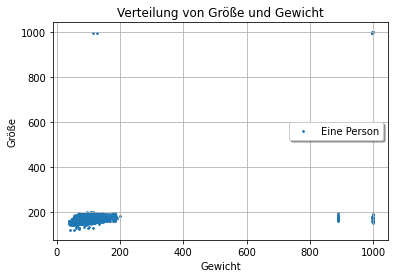

In [4]:
# YOUR CODE HERE

plt.scatter(health["Gewicht"], health["Groesse"],label = "Eine Person",s=3)

plt.legend(loc='center right', shadow=True, )
plt.xlabel('Gewicht')
plt.ylabel('Größe')
plt.grid(True)
plt.title("Verteilung von Größe und Gewicht")
plt.show()
# raise NotImplementedError()

## Gewicht / Größe c) [10 Punkte]

Anscheinend haben einige Teilnehmer Fantasieangaben zu Größe und Gewicht gemacht. Entfernen Sie alle Einträge die keinen Sinn ergeben (Gewicht > 250kg und Größe > 300cm). Speichern Sie Ihr Ergebnis wieder in der Variablen ```health_cleaned```.

Plotten Sie das Ergebnis erneut.

In [5]:
health_cleaned = health
toDrop = []
for i in health_cleaned:
    for j,o in enumerate(health_cleaned[i]):
        if (i == "Groesse" and o>250) or (i == "Gewicht" and o>300):
            toDrop.append(health_cleaned.index[j])
            
for i in set(toDrop):
    health_cleaned = health_cleaned.drop(i)

# YOUR CODE HERE
# raise NotImplementedError()

## Gewicht / Größe d) [10 Punkte]

Teilen Sie die Daten auf in Frauen und Männer. Plotten Sie für beide das Gewicht und die Größe in dem selben Plot mit verschiedenen Farben.

Speichern Sie die Daten für die Männer im DataFrame ```men```.

Speichern Sie die Daten für die Frauen im DataFrame ```women```.

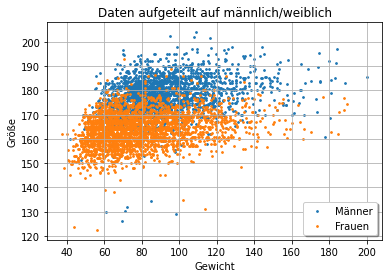

In [6]:
men = health_cleaned[health_cleaned.Geschlecht == "Male"]
women = health_cleaned[health_cleaned.Geschlecht == "Female"]

plt.scatter(men["Gewicht"], men["Groesse"],label='Männer',s=3)
plt.scatter(women["Gewicht"], women["Groesse"],label='Frauen',s=3)

plt.legend(loc='lower right', shadow=True, )
plt.xlabel('Gewicht')
plt.ylabel('Größe')
plt.grid(True)
plt.title("Daten aufgeteilt auf männlich/weiblich")
plt.show()
# YOUR CODE HERE
# raise NotImplementedError()

## Gewicht / Größe e) [12 Punkte]

Erstellen Sie einen neuen Pandas *DataFrame* (analog zu untenstehender Tabelle) der die charakteristischen Werte der Verteilungen angibt. Nennen Sie Ihren *DateFrame* ```verteilungen```.

| Merkmal | Geschlecht | Mittelwert | Median | Standardabweichung | Varianz |
|---------|------------|------------|--------|--------------------|---------|
| Gewicht | Male       |            |        |                    |         |
| Gewicht | Female     |            |        |                    |         |
| Gewicht | beide      |            |        |                    |         |
| Groesse | Male       |            |        |                    |         |
| Groesse | Female     |            |        |                    |         |
| Groesse | beide      |            |        |                    |         |

In [7]:
import numpy as np

# Füllen Sie folgendes Dictionary mit Werten auf
data = dict({
    'Merkmal': ['Gewicht', 'Gewicht', 'Gewicht', 'Groesse', 'Groesse', 'Groesse'],
    'Geschlecht': ['Male', 'Female', 'beide', 'Male', 'Female', 'beide'],
    'Mittelwert': [men["Gewicht"].mean(),women["Gewicht"].mean(),health_cleaned["Gewicht"].mean(),men["Groesse"].mean(),women["Groesse"].mean(),health_cleaned["Groesse"].mean(),],
    'Median': [men["Gewicht"].median(),women["Gewicht"].median(),health_cleaned["Gewicht"].median(),men["Groesse"].median(),women["Groesse"].median(),health_cleaned["Groesse"].median(),],
    'Standardabweichung': [men["Gewicht"].std(),women["Gewicht"].std(),health_cleaned["Gewicht"].std(),men["Groesse"].std(),women["Groesse"].std(),health_cleaned["Groesse"].std(),],
    'Varianz': [men["Gewicht"].var(),women["Gewicht"].var(),health_cleaned["Gewicht"].var(),men["Groesse"].var(),women["Groesse"].var(),health_cleaned["Groesse"].var(),]
})

# YOUR CODE HERE
# Erstelle DataFrame aus data
verteilungen = pd.DataFrame(data)
verteilungen

,Merkmal,Geschlecht,Mittelwert,Median,Standardabweichung,Varianz
0,Gewicht,Male,91.311092,87.4,21.816752,475.970650
1,Gewicht,Female,78.868954,73.9,22.733735,516.822692
2,Gewicht,beide,84.586612,81.0,23.160469,536.407309
3,Groesse,Male,177.584592,178.0,7.702354,59.326252
4,Groesse,Female,163.943560,164.0,6.921287,47.904214
5,Groesse,beide,170.212158,170.0,9.968268,99.366365


In [8]:
# Dies ist eine Testzelle, bitte ignorieren Sie diese!

## Gewicht / Größe f) [10 Punkte]

Beantworten Sie folgende Fragen:

1. Wieviel Prozent der Männer sind schwerer als der Durchschnitt der Männer?

   Speichern Sie Ihre Lösung in ```maenner_schwerer_als_Durchschnitt```
   
   
2. Wieviel Prozent der Frauen sind schwerer als der Durchschnitt der Frauen?

   Speichern Sie Ihre Lösung in ```frauen_schwerer_als_Durchschnitt```
   
   
3. Wieviel Prozent der Frauen sind schwerer als der durchschnittliche Mann?

   Speichern Sie Ihre Lösung in ```frauen_schwerer_als_Durchschnittsmann```
   
   
4. Wieviel Prozent der Frauen sind größer als 50% der Männer?

   Speichern Sie Ihre Lösung in ```frauen_groesser_als_Maenner```
   
   
5. Wieviel Prozent der Männer sind größer als 50% der Frauen?

   Speichern Sie Ihre Lösung in ```maenner_groesser_als_Frauen```
   
   
*Hinweis:* Wenn die Lösung 30% lautet, speichern Sie den Wert als Fließkommazahl 0.3


In [18]:
maenner_schwerer_als_Durchschnitt = len(men[men.Gewicht>data["Mittelwert"][0]])/len(men)
frauen_schwerer_als_Durchschnitt = len(women[women.Gewicht>data["Mittelwert"][1]])/len(women)
frauen_schwerer_als_Durchschnittsmann = len(women[women.Gewicht>data["Mittelwert"][0]])/len(women)
frauen_groesser_als_Maenner = len(women[women.Groesse>data["Median"][3]])/len(women)
maenner_groesser_als_Frauen = len(men[men.Groesse>data["Median"][4]])/len(men)

print(maenner_schwerer_als_Durchschnitt,frauen_schwerer_als_Durchschnitt,frauen_schwerer_als_Durchschnittsmann,frauen_groesser_als_Maenner,maenner_groesser_als_Frauen)

# YOUR CODE HERE
#raise NotImplementedError()

0.4208027621924903 0.41577981651376145 0.25688073394495414 0.01577981651376147 0.9607250755287009


## Gewicht / Größe g) [15 Punkte]

Wir möchten versuchen das Gewicht einer Person in Abhängigkeit seiner Größe vorherzusagen. Dazu können wir eine Ausgleichsgerade durch die Punkte legen. 

Eine Ausgleichsgerade ist eine Gerade die den mittleren quadratischen Abstand (das Quadrat der Residuen) zwischen der Gerade und den realen Datenpunkten minimiert. 

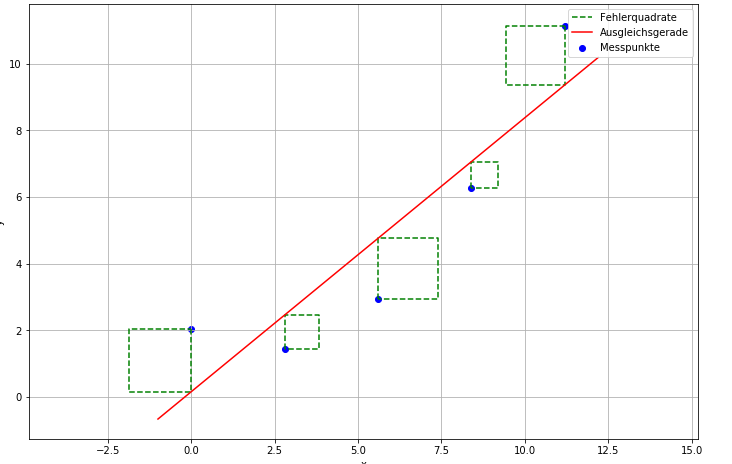

Implementieren Sie die Funktion ```fitLine(x_observed, y_observed)``` die für beobachtete X und Y Werte eine Ausgleichsgerade berechnet. Die Rückgabe der Funktion ist die Steigung und der Y-Achsenabschnitt der Geraden als Tupel.

*Hinweis:* Benutzen Sie keine bereits implementierten Funktionen für die Bestimmung der Ausgleichsgerade. Sie brauchen nur den Mittelwert (numpy.mean).

In [10]:
def fitLine(x_observed: [float], y_observed: [float]) -> (float, float):
    '''
    Berechne eine Ausgleichsgerade der Form:
    f(x) = m * x + b
    
    Arguments:
        x_observed -- x Werte
        y_observed -- y Werte
    Returns:
        m          -- Steigung
        b          -- Achsenabschnitt
    '''
    # YOUR CODE HERE
    x_observed = np.array(x_observed)
    y_observed = np.array(y_observed)
    var = 0
    x_std = 0
    y_std = 0
    
    x_m = x_observed.mean()
    y_m = y_observed.mean()
    for i in range(len(x_observed)):
        var += (x_observed[i]-x_m)*(y_observed[i]-y_m)
        x_std += (x_observed[i]-x_m)**2
    
    m = var/x_std
    b = y_m - m * x_m
    return (m,b)

    """x_observed = np.array(x_observed)
    y_observed = np.array(y_observed)
    x_m = x_observed.mean()
    y_m = y_observed.mean()
    m = y_m/x_m
    b = y_m - m * x_m
    return m,b"""
# print(fitLine([0,2.6,5.6,8.3,11.25],[2,1.8,3,6.2,11.25]))
# print(fitLine([1,2,3,4],[2,4,6,8]))
#    raise NotImplementedError()

## Gewicht / Größe h) [5 Punkte]

Berechnen Sie folgende Ausgleichsgeraden für die Frauen:

1. Vorhersage des Gewichts mittels der Größe
2. Vorhersage der Größe mittels des Gewichts

Speichern Sie Ihre Lösung in den Variablen ```steigung1, achsenabschnitt1``` sowie ```steigung2, achsenabschnitt2```.

In [11]:
steigung1 = fitLine(women.Gewicht,women.Groesse)[0]
achsenabschnitt1 = fitLine(women.Gewicht,women.Groesse)[1]
steigung2 = fitLine(women.Groesse,women.Gewicht)[0]
achsenabschnitt2 = fitLine(women.Groesse,women.Gewicht)[1]
# YOUR CODE HERE
#raise NotImplementedError()

steigung2, achsenabschnitt2

(0.822869697911858, -56.03523326138367)

## Gewicht / Größe i) [10 Punkte]

Plotten Sie die Verteilung der Größe vs Gewicht für die Frauen und zeichnen die oben berechneten Geraden ein.

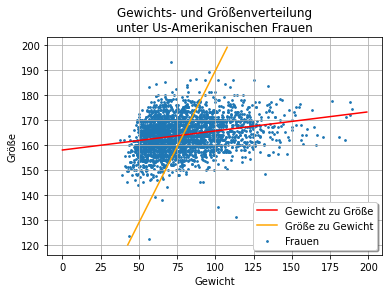

In [12]:
import matplotlib.pyplot as plt



plt.scatter(women.Gewicht,women.Groesse, s=3, linestyle='solid',label='Frauen')
x = range(200)
y = range(120,200)
plt.plot(x, x * steigung1 + achsenabschnitt1, linewidth=1.5,label='Gewicht zu Größe',color = 'red')
plt.plot(y * steigung2 + achsenabschnitt2, y, linewidth=1.5,label='Größe zu Gewicht',color = 'orange')

plt.legend(loc='lower right', shadow=True, )
plt.xlabel('Gewicht')
plt.ylabel('Größe')
plt.grid(True)
plt.title("Gewichts- und Größenverteilung\nunter Us-Amerikanischen Frauen")
plt.show()

# YOUR CODE HERE
# raise NotImplementedError()

## Gewicht / Größe j) [10 Punkte]

Implementieren Sie die Funktion ```correlation(x, y)``` welche den Korrelationskoeffizienten zwischen den Datenpunkten ```x``` und ```y``` berechnet.

*Hinweis:* Benutzen Sie keine vordefinierten Funktionen wie ```scipy.stats.pearsonr``` sondern implementieren Sie die Funktion selbst. Sie können selbstverständlich Funktionen wie ```numpy.mean``` oder ```numpy.sqrt``` benutzen.

Sollten Sie diese Teilaufgabe nicht lösen, können Sie im Folgenden mit der Funktion ```scipy.stats.pearsonr``` arbeiten.

In [13]:
def correlation(x: [float], y: [float]) -> float:
    '''
    Berechne den Pearson Korrelationskoeffizienten
    
    Args:
        x    -- Eine Liste mit x Werten
        y    -- Eine Liste mit y Werten
    Returns:
        corr -- Korrelationskoeffizient
    '''
    # YOUR CODE HERE
    x = np.array(x)
    y = np.array(y)
    var = 0
    x_std = 0
    y_std = 0
    
    x_m = x.mean()
    y_m = y.mean()
    for i in range(len(x)):
        var += (x[i]-x_m)*(y[i]-y_m)
        x_std += (x[i]-x_m)**2
        y_std += (y[i]-y_m)**2
    
    return var/((x_std*y_std)**0.5)

#raise NotImplementedError()

## Gewicht / Größe k) [5 Punkte]

Berechnen Sie den Korrelationskoeffizienten für Größe und Gewicht der Frauen und speichern Sie Ihre Lösung in der Variablen ```korrelation```. 

In [14]:
korrelation = correlation(women.Groesse,women.Gewicht)
# YOUR CODE HERE
#raise NotImplementedError()

print(f'Der Korrelationskoeffizient für die Größe und das Gewicht der Frauen ist {korrelation:.4f}.')

Der Korrelationskoeffizient für die Größe und das Gewicht der Frauen ist 0.2505.


## Gewicht / Größe l) [12 Punkte]

Wir wollen nun eine Normalverteilung an die Daten anpassen. In Aufgabenteil e) haben wir bereits die charakteristischen Parameter für die Merkmale **Gewicht** und **Größe** der Frauen und Männer berechnet.

Plotten Sie pro Geschlecht und Merkmal ein Histogramm (mit aktiviertem Parameter ```density=True```). Dies ergibt **4** Plots.

Zeichnen Sie in jeden Plot eine Normalverteilung auf Basis der charakteristischen Parameter.

*Hinweis:* Benutzen Sie die Dichtefunktion pdf aus dem Modul ```stats.norm```.

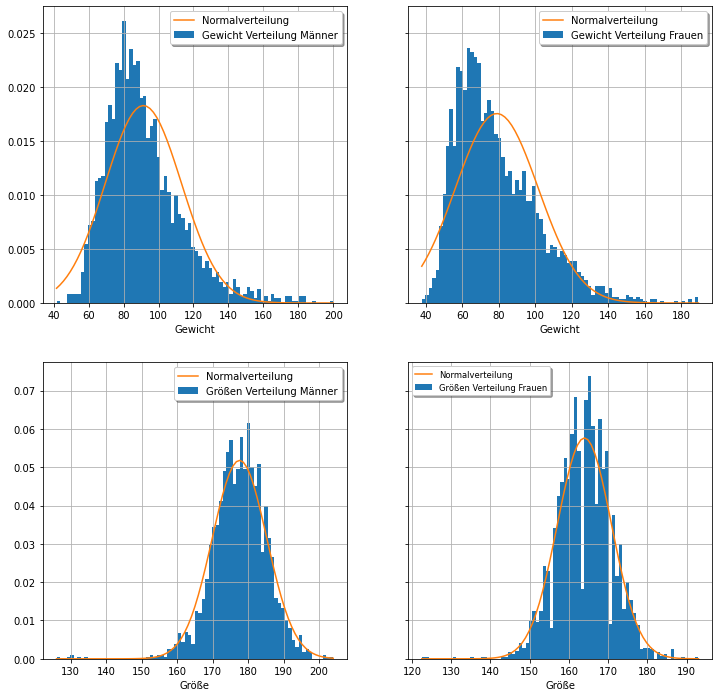

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
fig, axs = plt.subplots(2,2,sharey="row",figsize=(12,12))

c, bins1,l = axs[0,0].hist(men.Gewicht,80,density=True,label="Gewicht Verteilung Männer")
pdf1 = stats.norm.pdf(bins1,loc = men.Gewicht.mean(),scale = men.Gewicht.std())
axs[0,0].plot(bins1, pdf1,label="Normalverteilung")
axs[0,0].grid()
axs[0,0].legend(loc='upper right', shadow=True,)
axs[0,0].set_xlabel("Gewicht")

c, bins2,l = axs[1,0].hist(men.Groesse,80,density=True,label="Größen Verteilung Männer")
pdf2 = stats.norm.pdf(bins2,loc = men.Groesse.mean(),scale = men.Groesse.std())
axs[1,0].plot(bins2, pdf2,label="Normalverteilung")
axs[1,0].grid()
axs[1,0].legend(loc='upper right', shadow=True,)
axs[1,0].set_xlabel("Größe")

c, bins3,l = axs[0,1].hist(women.Gewicht,80,density=True,label="Gewicht Verteilung Frauen")
pdf3 = stats.norm.pdf(bins3,loc = women.Gewicht.mean(),scale = women.Gewicht.std())
axs[0,1].plot(bins3, pdf3,label="Normalverteilung")
axs[0,1].grid()
axs[0,1].legend(loc='upper right', shadow=True,)
axs[0,1].set_xlabel("Gewicht")

c, bins4,l = axs[1,1].hist(women.Groesse,80,density=True,label="Größen Verteilung Frauen")
pdf4 = stats.norm.pdf(bins4,loc = women.Groesse.mean(),scale = women.Groesse.std())
axs[1,1].plot(bins4, pdf4,label="Normalverteilung")
axs[1,1].grid()
axs[1,1].legend(loc='upper left', shadow=True,fontsize="small")
axs[1,1].set_xlabel("Größe")

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
# YOUR CODE HERE
# raise NotImplementedError()

## Gewicht / Größe m) [12 Punkte]

Bei näherer Betrachtung fällt auf, dass die Histogramme nicht symmetrisch sondern leicht schief sind.

Eine Verteilung kann linksschief oder rechtsschief sein (vgl. https://de.wikipedia.org/wiki/Schiefe_(Statistik)).

Wir wollen nun eine schiefe Normalverteilung an unsere Daten anpassen. Dazu gibt es das Modul ```stats.skewnorm```. Da die Berechnung der Parameter nicht so einfach ist, können Sie die Funktion ```stats.skewnorm.fit``` nutzen um die charakteristischen Parameter für diese Verteilung zu finden.

Plotten Sie für jedes Merkmal und Geschlecht ein Histogramm, die Normalverteilung aus dem vorigen Aufgabenteil und die schiefe Normalverteilung.

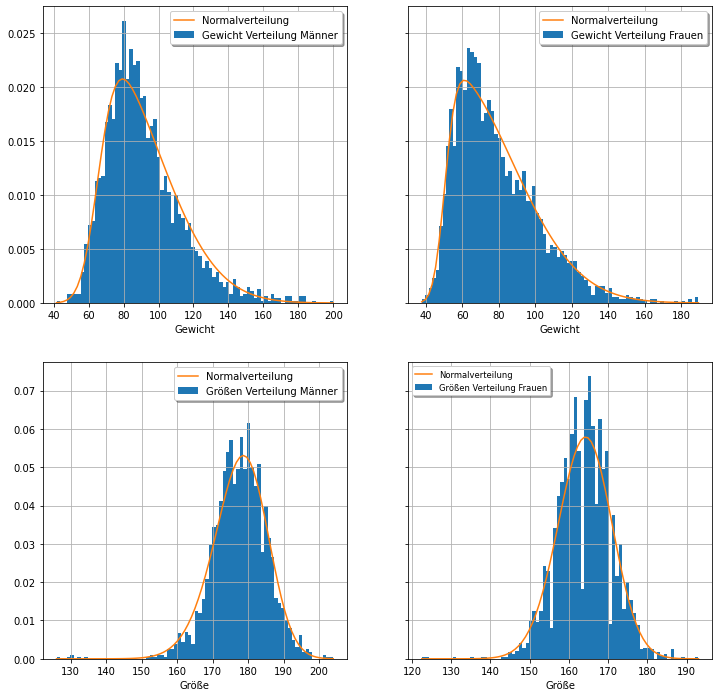

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm
import numpy as np


fig, axs = plt.subplots(2,2,sharey="row",figsize=(12,12))

c, bins1,l = axs[0,0].hist(men.Gewicht,80,density=True,label="Gewicht Verteilung Männer")
pdf1 = stats.norm.pdf(bins1,loc = men.Gewicht.mean(),scale = men.Gewicht.std())
p1 = stats.skewnorm.fit(men.Gewicht)
pdf1 = stats.skewnorm.pdf(bins1, *p1 )
axs[0,0].plot(bins1, pdf1,label="Normalverteilung")
axs[0,0].grid()
axs[0,0].legend(loc='upper right', shadow=True,)
axs[0,0].set_xlabel("Gewicht")

c, bins2,l = axs[1,0].hist(men.Groesse,80,density=True,label="Größen Verteilung Männer")
pdf2 = stats.norm.pdf(bins2,loc = men.Groesse.mean(),scale = men.Groesse.std())
p2 = stats.skewnorm.fit(men.Groesse)
pdf2 = stats.skewnorm.pdf(bins2, *p2 )
axs[1,0].plot(bins2, pdf2,label="Normalverteilung")
axs[1,0].grid()
axs[1,0].legend(loc='upper right', shadow=True,)
axs[1,0].set_xlabel("Größe")

c, bins3,l = axs[0,1].hist(women.Gewicht,80,density=True,label="Gewicht Verteilung Frauen")
pdf3 = stats.norm.pdf(bins3,loc = women.Gewicht.mean(),scale = women.Gewicht.std())
p3 = stats.skewnorm.fit(women.Gewicht)
pdf3 = stats.skewnorm.pdf(bins3, *p3 )
axs[0,1].plot(bins3, pdf3,label="Normalverteilung")
axs[0,1].grid()
axs[0,1].legend(loc='upper right', shadow=True,)
axs[0,1].set_xlabel("Gewicht")

c, bins4,l = axs[1,1].hist(women.Groesse,80,density=True,label="Größen Verteilung Frauen")
pdf4 = stats.norm.pdf(bins4,loc = women.Groesse.mean(),scale = women.Groesse.std())
p4 = stats.skewnorm.fit(women.Groesse)
pdf4 = stats.skewnorm.pdf(bins4, *p4 )
axs[1,1].plot(bins4, pdf4,label="Normalverteilung")
axs[1,1].grid()
axs[1,1].legend(loc='upper left', shadow=True,fontsize="small")
axs[1,1].set_xlabel("Größe")

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
"""
# YOUR CODE HERE
fig, axs = plt.subplots(2,2,sharey=True)

c, bins1,l = axs[0,0].hist(men.Gewicht,50,density=True)
pdf1 = stats.skewnorm.pdf(bins1,stats.norm.pdf(men.Gewicht.mean(),scale = men.Gewicht.std()))
axs[0,0].plot(bins1, pdf1)

c, bins2,l = axs[1,0].hist(men.Groesse,50,density=True)
pdf2 = stats.norm.pdf(bins2,loc = men.Groesse.mean(),scale = men.Groesse.std())
axs[1,0].plot(bins2, pdf2)

c, bins3,l = axs[0,1].hist(women.Gewicht,50,density=True)
pdf3 = stats.norm.pdf(bins3,loc = women.Gewicht.mean(),scale = women.Gewicht.std())
axs[0,1].plot(bins3, pdf3)

c, bins4,l = axs[1,1].hist(women.Groesse,50,density=True)
pdf4 = stats.norm.pdf(bins4,loc = women.Groesse.mean(),scale = women.Groesse.std())
axs[1,1].plot(bins4, pdf4)

plt.show()
"""
None
#raise NotImplementedError()

## Frohe Weihnachten

Führen Sie die folgende Zelle aus.

In [ ]:
from data import Tree
        
Tree().draw()